# DL DNN 정리
- toc:true

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## ReLU함수
ReLU함수의 등장 배경

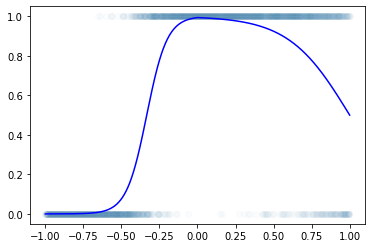

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-dnnex0.csv')
plt.plot(df.x,df.y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')

위와 같이 증가하다가 감소하는 underlying을 표현하기 위해서는 꺽이는 그래프를 만들어야 한다. 꺽인 그래프를 만드는 방법은 ReLU함수 등을 사용하면 된다.



$ReLU(x) = \max(0,x)$

In [ ]:
x= torch.tensor(df.x).float().reshape(-1,1)
y= torch.tensor(df.y).float().reshape(-1,1)

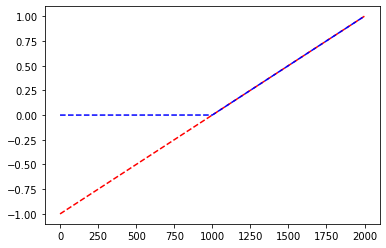

In [ ]:
relu=torch.nn.ReLU()
plt.plot(x,'--r')
plt.plot(relu(x),'--b')

위의 그래프의 파란선을 보면 음수는 0이 되고 양수의 값은 그대로인 것을 확인할 수 있다. 이것이 렐루함수이다.

## 꺽인 그래프 만들기
선형 변환 $\to$ ReLU $\to$ 선형변환 구조를 사용하여 꺽인 그래프를 표현

In [ ]:
torch.manual_seed(43052)
l1 = torch.nn.Linear(in_features=1,out_features=2,bias=True) # 입력이 1개인데 출력이 2개 -> 꺽이는 점 최대 1개
a1 = torch.nn.ReLU() # 음수는 0 양수는 그대로
l2 = torch.nn.Linear(in_features=2,out_features=1,bias=True) # l1에 의해 출력이 2개가 되어 l2의 input은 2이고 이를 다시 하나로 만들기 위해 output을 1로 지정
a2 = torch.nn.Sigmoid() # 출력의 범위는 0 ~ 1 & 0과 1에 가까워질수록 기울기가 완만해짐

In [ ]:
net = torch.nn.Sequential(l1,a1,l2,a2)

In [ ]:
l1.weight.data = torch.tensor([[1.0],[-1.0]])
l1.bias.data = torch.tensor([0.0, 0.0])

l2.weight.data = torch.tensor([[ -4.5, -9.0]])
l2.bias.data= torch.tensor([4.5])

l1.weight,l1.bias,l2.weight,l2.bias

(Parameter containing:
 tensor([[ 1.],
         [-1.]], requires_grad=True), Parameter containing:
 tensor([0., 0.], requires_grad=True), Parameter containing:
 tensor([[-4.5000, -9.0000]], requires_grad=True), Parameter containing:
 tensor([4.5000], requires_grad=True))

### 선형변환을 통해 그래프 만들기

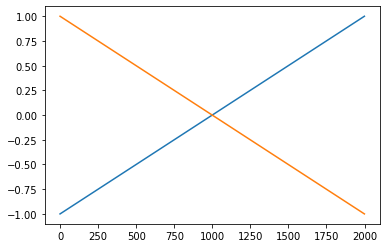

In [ ]:
plt.plot(l1(x).data)

### ReLU를 통해 꺽이는 점 만들기

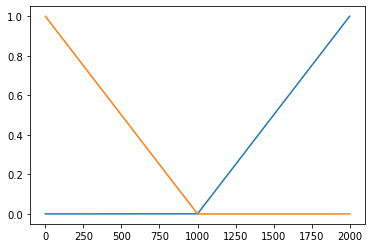

In [ ]:
plt.plot(a1(l1(x)).data)

### 선형 변환을 통해 2개의 그래프를 하나로 만들기

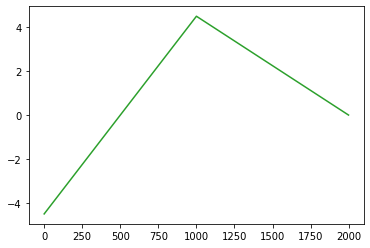

In [ ]:
plt.plot(l2(a1(l1(x))).data,color='C2')

### 시그모이드 함수를 사용해 비선형 + 0 ~ 1사이에 존재하도록 변환

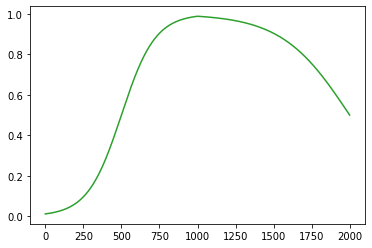

In [ ]:
plt.plot(a2(l2(a1(l1(x)))).data,color='C2')
#plt.plot(net(x).data,color='C2') # 위와 똑같은 결과

## DNN 적용

- 다양한 예제를 위와 같은 모델로 적합시킬 수 있다.
- 선형 변환시 out_feature를 크게 지정하면 지정할수록 꺽이는 점이 많아져 표현력이 증가함(단, 그만큼 모델이 복잡해지고 파라미터의 수가 커짐)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-dnnex2.csv')
df

,x,underlying,y
0,-1.000000,14.791438,14.486265
1,-0.999000,14.756562,14.832600
2,-0.997999,14.721663,15.473211
3,-0.996999,14.686739,14.757734
4,-0.995998,14.651794,15.042901
...,...,...,...
1995,0.995998,5.299511,5.511416
1996,0.996999,5.322140,6.022263
1997,0.997999,5.344736,4.989637
1998,0.999000,5.367299,5.575369


In [ ]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)

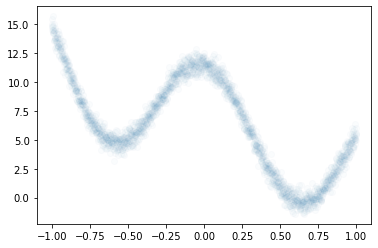

In [ ]:
plt.plot(x,y,'o',alpha=0.02)
#plt.plot(df.x,df.underlying,'-b')

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=32), # x:(n,1) --> u1:(n,32)
    torch.nn.ReLU(), # u1:(n,32) --> v1:(n,32) 
    torch.nn.Linear(in_features=32,out_features=1) # v1:(n,32) --> u2:(n,1)
    # 이번에는 시그모이드를 포함하지 않았는데 이는 y값이 0~1사이에 존재하지 않아서...
)

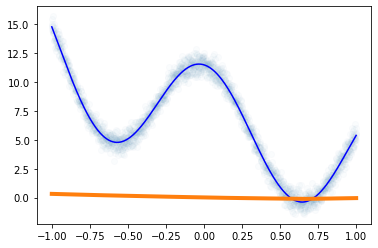

In [ ]:
# 학습전
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,lw=4)

In [ ]:
loss_fn = torch.nn.MSELoss()

optimizr = torch.optim.Adam(net.parameters())

for epoc in range(12000): 
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

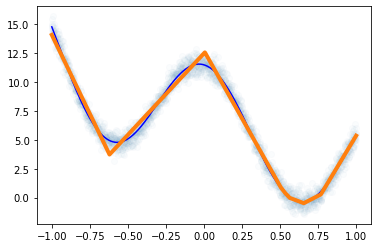

In [ ]:
# 12,000번 학습 후
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,lw=4)

위 그래프를 확인해보면 충분히 많이 학습했음에도 불구하고 net와 underlying이 일치하지 않는 것을 확인할 수 있다. 이는 local minimum에 빠져서 제대로 학습되지 못하고 있는 것을 알 수 있다.
$\to$ 아래는 랜덤시드를 변경해주어 적절한 초기값을 사용한 결과이다

In [ ]:
torch.manual_seed(5)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=32),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=32,out_features=1) 
)

In [ ]:
loss_fn = torch.nn.MSELoss()

optimizr = torch.optim.Adam(net.parameters())

for epoc in range(12000): 
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

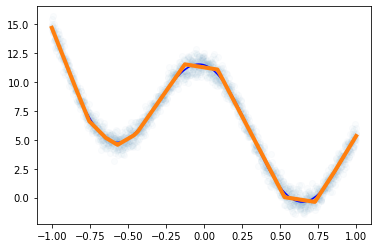

In [ ]:
# 12,000번 학습 후
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,lw=4)

## 시벤코 정리(universal approximation theorem, 1989)
시벤코 정리는 선형변환 $\to$ 시그모이드 $\to$ 선형변환을 사용하면 모든 연속함수를 원하는 정확도로 근사시킬수 있다.  
- 요즘은 선형변환 $\to$ 렐루 $\to$ 선형변환 와 같은 조합을 사용한다..
- 아래와 같은 적절한 선형변환(적절한 노드의 개수와 적절한 weight와 bias)을 하면 다양한 모양의 underlying을 그릴수 있다.

In [ ]:
h = lambda x: torch.sigmoid(200*(x+0.5))+torch.sigmoid(-200*(x-0.5))-1.0

class MyActivation(torch.nn.Module): ## 사용자정의 활성화함수를 선언하는 방법
    def __init__(self):
        super().__init__() 
    def forward(self, input):
        return h(input) # activation 의 출력 

### 노드가 3개일때

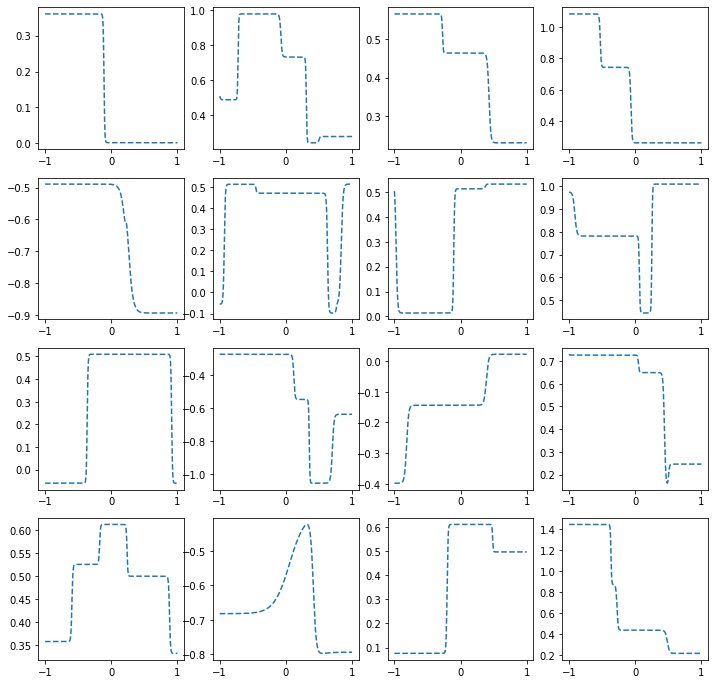

In [ ]:
torch.manual_seed(43052)
fig, ax = plt.subplots(4,4,figsize=(12,12))
for i in range(4):
    for j in range(4):
        net = torch.nn.Sequential(
            torch.nn.Linear(1,3),
            MyActivation(),
            torch.nn.Linear(3,1)
        )
        ax[i,j].plot(x,net(x).data,'--')

### 노드가 1024개일때

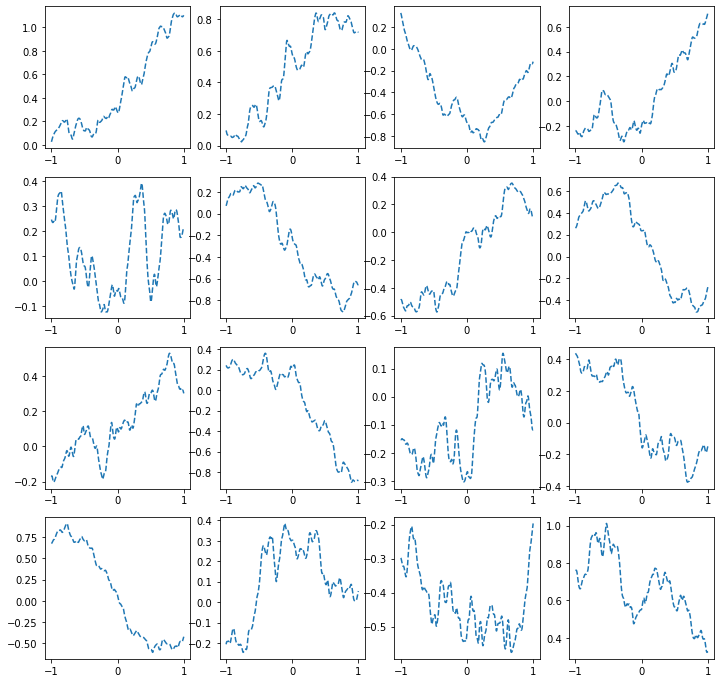

In [ ]:
torch.manual_seed(43052)
fig, ax = plt.subplots(4,4,figsize=(12,12))
for i in range(4):
    for j in range(4):
        net = torch.nn.Sequential(
            torch.nn.Linear(1,1024),
            MyActivation(),
            torch.nn.Linear(1024,1)
        )
        ax[i,j].plot(x,net(x).data,'--')

`-` 정리: 히든레이어의 노드의 수가 많으면 많을수록 표현력이 증가한다. 

## 경사하강법 용어 정리

`-` ver 1: 예전: gradient descent, batch gradient descent $\to$ 요즘:  gradient descent

모든 샘플을 이용해 순간 기울기를 구하고 이를 바탕으로 업데이트  
(epoch1) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \to slope  \to update$  
(epoch2) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \to slope  \to update$  
...


`+` 앞서 사용한 코드들은 gradient descent임
``` python
yhat = net(x)

loss = torch.sum((y-yhat)**2) # loss = torch.nn.MSELoss(yhat, y)

loss.backward() 

optim.step()
optim.zero_grad()
```
---

`-` ver 2: 예전: stochastic gradient descent $\to$ 요즘: stochastic gradient descent with batch size = 1

샘플 하나당 업데이트 한번 (하나의 샘플만을 이용해 slope계산)

(epoch1) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \to slope \to update$
- $loss=(y_2-\beta_0-\beta_1x_2)^2 \to slope \to update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2  \to  slope  \to  update$

(epoch2) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2  \to slope  \to  update$
- $loss=(y_2-\beta_0-\beta_1x_2)^2  \to slope  \to  update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2  \to  slope  \to  update$

...

---

`-` ver 3: 예전: mini-batch gradient descent, mini-batch stochastic gradient descent $\to$ 요즘: stochastic gradient descent

`-` ver3: $m (\leq n)$ 개의 샘플을 이용하여 slope 계산

$m=3$이라고 하자. 

(epoch1) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2  \to  slope  \to  update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2  \to  slope  \to  update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2  \to  slope  \to  update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2  \to  slope  \to  update$

(epoch2) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2  \to  slope  \to  update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2  \to  slope  \to  update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2  \to  slope  \to  update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2  \to  slope  \to  update$

...

```python
# X의 tensor size = torch.Size([12665, 784]), 
# y의 tensor size = torch.Size([12665, 1])
# 12665 / 2048 ≈ 6.18

ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=2048) 

for epoc in range(10): # epoch = 7 * 10번
    for xx,yy in dl: # 7번
        ## 1
        #yhat = net(xx)
        ## 2 
        loss = loss_fn(net(xx),yy) 
        ## 3 
        loss.backward() 
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
```


---

`+` 정리: stochastic gradient descent를 사용하면 정확도는 비슷하지만 학습속도가 gradient descent보다 빠르다.

## 오버피팅
- 모델이 train 데이터에 너무 적합되어서 test 데이터의 추세를 맞추지 못하는 경우
- 데이터를 underlying + 오차라고 할때 데이터의 추세가 underlying이 아닌 오차를 따라갈 경우  
(정의라기 보다는 오버피팅 용어에 대한 간단한 설명)

In [2]:
torch.manual_seed(5) 
x = torch.linspace(0,1,100).reshape(100,1)
y = torch.randn(100).reshape(100,1)*0.01

x와 y는 랜덤하게 뽑은 값이므로 x와 y사이에는 어떠한 관계도도 없다.

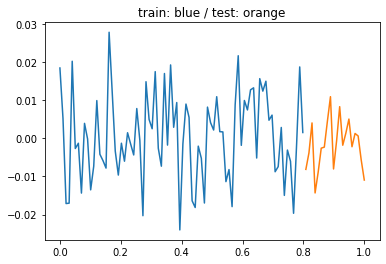

In [3]:
xtr = x[:80] 
ytr = y[:80]
xtest = x[80:]
ytest = y[80:]
plt.plot(xtr,ytr)
plt.plot(xtest,ytest)
plt.title('train: blue / test: orange');

In [10]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)
)

loss_fn = torch.nn.MSELoss()

optim = torch.optim.Adam(net.parameters())

for epoch in range(1000):
  yhat = net(xtr)
  loss = loss_fn(yhat,ytr)
  loss.backward()
  optim.step()
  optim.zero_grad()

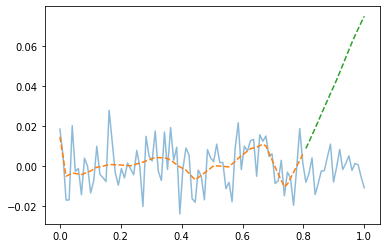

In [11]:
plt.plot(x,y,alpha=0.5)
plt.plot(xtr,net(xtr).data,'--') # prediction (train) 
plt.plot(xtest,net(xtest).data,'--') # prediction with unseen data (test) 

위의 점선들을 확인하면 train data부분인 주황점선은 데이터의 분포를 잘 따라가지만 test data부분인 초록 점선은 데이터의 분포를 전혀 예측하지 못하고 있다. 이를 통해 해당 모델은 오버피팅이 되어 있는 것을 알 수 있다.

## 드랍아웃

In [ ]:
torch.manual_seed(1) 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512,out_features=1)) 

optimizr= torch.optim.Adam(net.parameters())

loss_fn= torch.nn.MSELoss()

for epoc in range(1000): 
    ## 1 
    # net(xtr) 
    ## 2 
    loss=loss_fn(net(xtr),ytr) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad() 

위와 같은 방식으로 드랍아웃층을 활성화 함수 다음에 위치시킨다.  
```python
torch.nn.Dropout(0.9)
```
위 코드는 드랍아웃층의 노드중 90%를 임의로 골라 결과를 0으로 만들고 나머지 10%의 노드는 10배만큼 값이 커지게 만들어 노드를 통과한 값들의 총합을 일정하게 유지시켜준다. 

> 드랍아웃 정리
- 드랍아웃 레이어
- 구조: 입력 -> 드랍아웃 레이어 -> 출력
- 역할: `(1)` 입력의 일부를 임의로 0으로 만드는 역할(랜덤 포레스트와 비슷한 알고리즘) `(2)` 0이 안된 것들은 스칼래배하여 드랍아웃을 통과한 모든 숫자들의 총합이 일정하게 되도록 조정
- 효과: 오버피팅을 억제하는 효과가 있음
- 의미: each iteration(each epoch x)마다 학습에 참여하는 노드가 로테이션으로 랜덤으로 결정됨.
- 느낌: 모든 노드가 골고루 학습가능 + 한 두개의 특화된 능력치가 개발되기 보다 평균적인 능력치가 전박적으로 개선됨